<a href="https://colab.research.google.com/github/nullvoid-ky/introduction-to-machine-learning-and-deep-learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
# https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
df = pd.read_csv('/content/student_exam_scores.csv')

In [81]:
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [82]:
# doing classification by who pass Exam
print(df.sleep_hours.max())
print(df.sleep_hours.min())

9.0
4.0


In [83]:
new_df = df.copy()
new_df["attendance_ratio"] = new_df["attendance_percent"] / 100
new_df["sleep_ratio"] = new_df["sleep_hours"] / 12
new_df["studied_ratio"] = new_df["hours_studied"] / 12
new_df["previous_ratio"] = new_df["previous_scores"] / 100

new_df["exam_pass"] = (new_df["exam_score"] >= 30).astype(int)

In [84]:
X = new_df[['studied_ratio','sleep_ratio','attendance_ratio','previous_ratio']]
y = new_df[['exam_pass']]

In [85]:
X

,studied_ratio,sleep_ratio,attendance_ratio,previous_ratio
0,0.666667,0.733333,0.721,0.45
1,0.108333,0.716667,0.607,0.55
2,0.333333,0.683333,0.737,0.86
3,0.291667,0.400000,0.951,0.66
4,0.758333,0.533333,0.898,0.71
...,...,...,...,...
195,0.875000,0.450000,0.940,0.87
196,0.591667,0.508333,0.851,0.92
197,0.133333,0.575000,0.638,0.76
198,1.000000,0.608333,0.505,0.58


In [86]:
y

,exam_pass
0,1
1,0
2,1
3,1
4,1
...,...
195,1
196,1
197,0
198,1


In [87]:
new_df = new_df.drop(
    columns=[
        'student_id',
        'hours_studied',
        'sleep_hours',
        'attendance_percent',
        'previous_scores',
        'exam_score'
    ],
    errors='ignore'  # prevents crash if some columns already missing
)


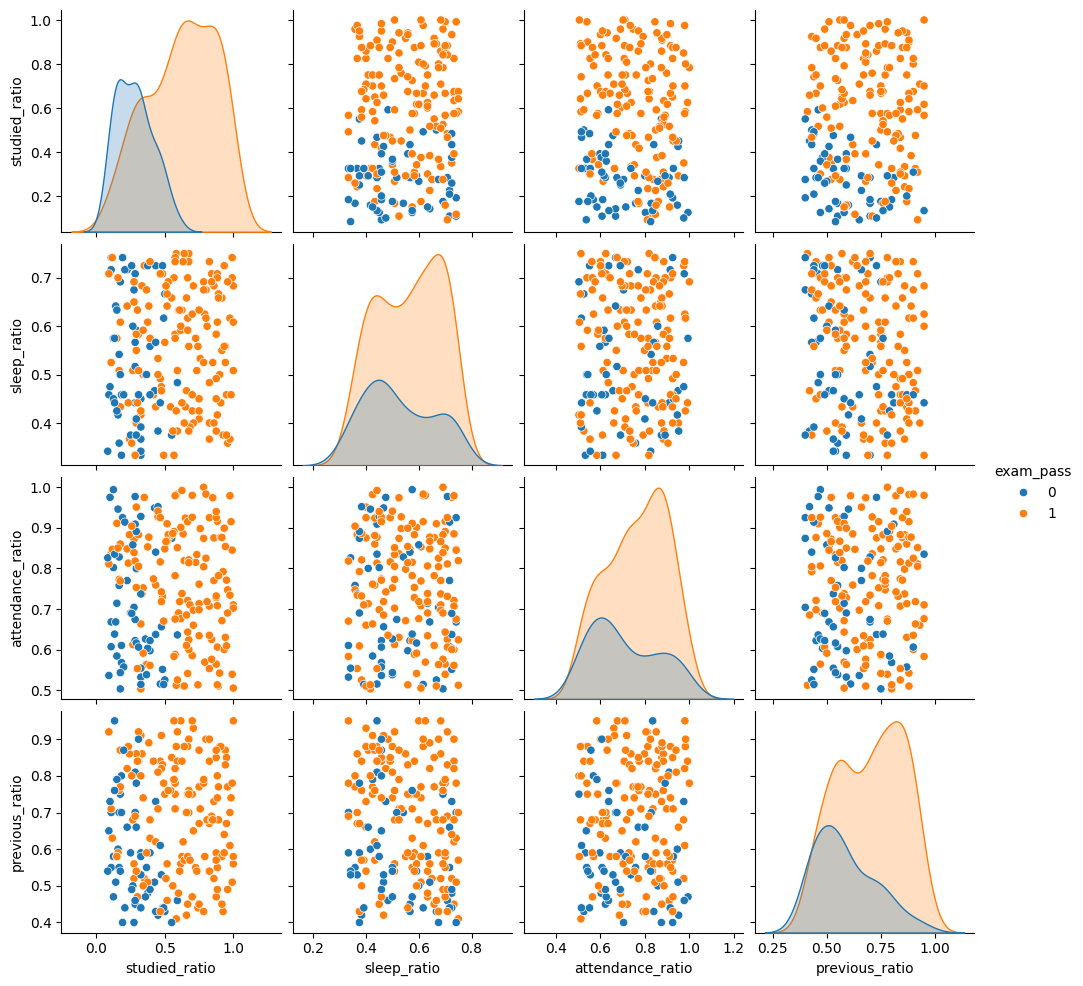

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(new_df, hue='exam_pass',
             vars=['studied_ratio', 'sleep_ratio', 'attendance_ratio', 'previous_ratio'])
plt.show()


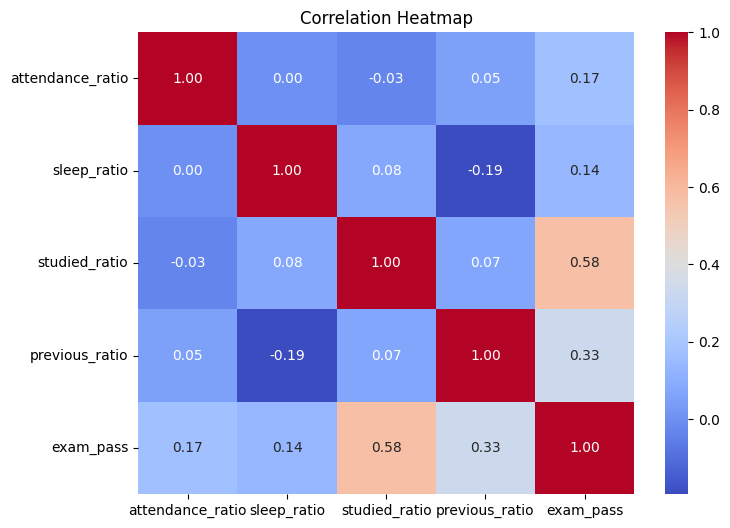

In [89]:
corr = new_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


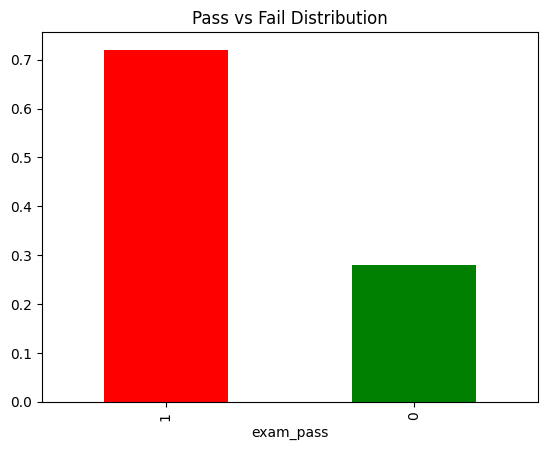

In [90]:
new_df['exam_pass'].value_counts(normalize=True).plot(kind='bar', color=['red', 'green'])
plt.title("Pass vs Fail Distribution")
plt.show()


In [98]:
from sklearn.model_selection import train_test_split

X = new_df[['studied_ratio', 'sleep_ratio', 'attendance_ratio', 'previous_ratio']]
# X = new_df[['studied_ratio']]
y = new_df['exam_pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [100]:
import pandas as pd

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

fi = pd.Series(model.feature_importances_, index=X_train.columns)
fi.sort_values(ascending=False)


,0
studied_ratio,0.486183
previous_ratio,0.213577
attendance_ratio,0.184060
sleep_ratio,0.116181


In [101]:
# one-feature model
X1_train = X_train[['studied_ratio']]
X1_test = X_test[['studied_ratio']]

model1 = LogisticRegression().fit(X1_train, y_train)
acc1 = model1.score(X1_test, y_test)

# all-feature model
model_all = LogisticRegression().fit(X_train, y_train)
acc_all = model_all.score(X_test, y_test)

print(f"1-feature accuracy: {acc1:.3f}")
print(f"All-feature accuracy: {acc_all:.3f}")


1-feature accuracy: 0.825
All-feature accuracy: 0.825


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define 7 models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train & evaluate each
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name:25s}: {acc:.3f}")


Logistic Regression      : 0.825
Decision Tree            : 0.825
Random Forest            : 0.800
K-Nearest Neighbors      : 0.850
Support Vector Machine   : 0.800
Naive Bayes              : 0.875
Gradient Boosting        : 0.825


                    model  accuracy  precision    recall        f1   roc_auc
0             Naive Bayes     0.875   0.928571  0.896552  0.912281  0.899687
1     K-Nearest Neighbors     0.850   0.896552  0.896552  0.896552  0.920063
2     Logistic Regression     0.825   0.805556  1.000000  0.892308  0.937304
3       Gradient Boosting     0.825   0.892857  0.862069  0.877193  0.893417
4           Decision Tree     0.825   0.892857  0.862069  0.877193  0.865204
5           Random Forest     0.800   0.862069  0.862069  0.862069  0.884013
6  Support Vector Machine     0.800   0.862069  0.862069  0.862069  0.924765

=== Best by F1: Naive Bayes ===
              precision    recall  f1-score   support

           0      0.750     0.818     0.783        11
           1      0.929     0.897     0.912        29

    accuracy                          0.875        40
   macro avg      0.839     0.857     0.847        40
weighted avg      0.879     0.875     0.877        40



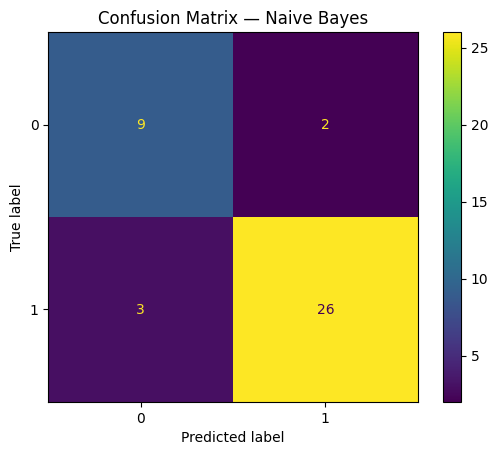

In [103]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt

# ---- Train & evaluate ----
results = []
reports = {}

fitted = {}  # keep trained models if you want to reuse later

for name, model in models.items():
    model.fit(X_train, y_train)
    fitted[name] = model

    # predictions
    y_pred = model.predict(X_test)

    # proba/score for ROC-AUC (works for SVC with probability=True)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = None

    # metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_scores) if y_scores is not None else np.nan

    results.append({
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc
    })

    # full text report (optional)
    reports[name] = classification_report(y_test, y_pred, digits=3)

# ---- Summary table (sorted by F1) ----
summary = pd.DataFrame(results).sort_values("f1", ascending=False).reset_index(drop=True)
print(summary)

# ---- Show best model’s confusion matrix & classification report ----
best_name = summary.loc[0, "model"]
print(f"\n=== Best by F1: {best_name} ===")
print(reports[best_name])

ConfusionMatrixDisplay.from_estimator(fitted[best_name], X_test, y_test)
plt.title(f"Confusion Matrix — {best_name}")
plt.show()


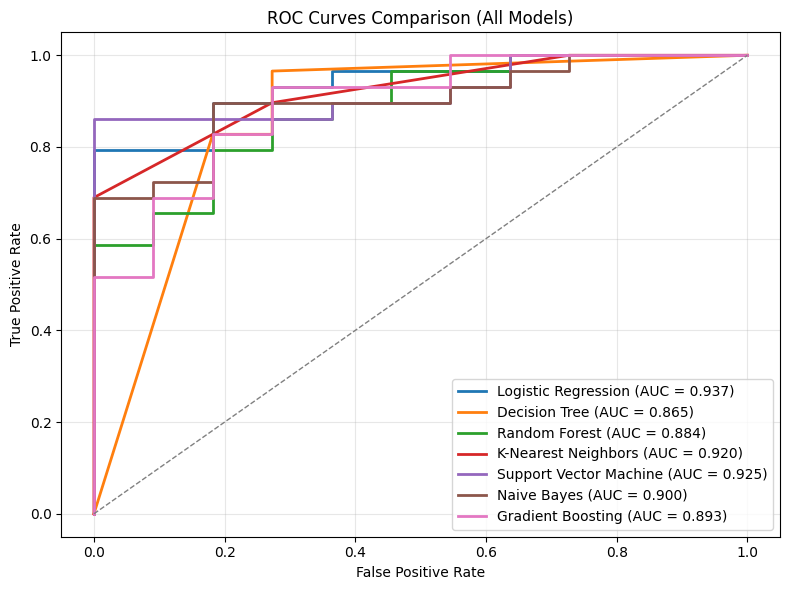

In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, mdl in fitted.items():
    if hasattr(mdl, "predict_proba") or hasattr(mdl, "decision_function"):
        try:
            # Get scores
            if hasattr(mdl, "predict_proba"):
                y_score = mdl.predict_proba(X_test)[:, 1]
            else:
                y_score = mdl.decision_function(X_test)

            # Compute ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

        except Exception as e:
            print(f"Skipped {name}: {e}")

# Plot base line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1)

plt.title("ROC Curves Comparison (All Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [105]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# ---- Define PCA + RandomForest pipeline ----
pca_rf = Pipeline([
    ("scaler", StandardScaler()),       # standardize features (PCA needs it)
    ("pca", PCA(n_components=2)),       # reduce to 2 principal components
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

# ---- Fit & evaluate ----
pca_rf.fit(X_train, y_train)
y_pred = pca_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"PCA + RandomForest Accuracy: {acc:.3f}")
print(classification_report(y_test, y_pred))


PCA + RandomForest Accuracy: 0.750
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.79      0.90      0.84        29

    accuracy                           0.75        40
   macro avg       0.68      0.63      0.64        40
weighted avg       0.73      0.75      0.73        40



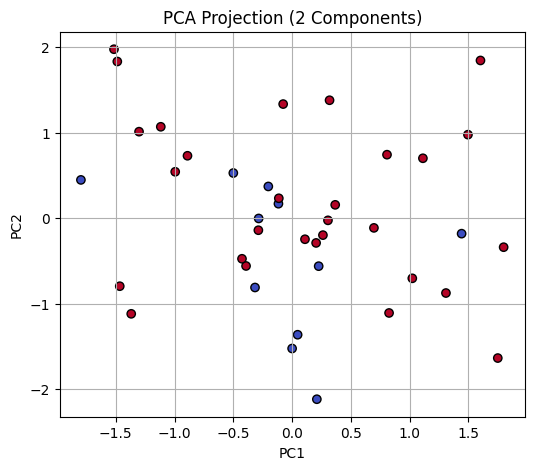

In [108]:
import matplotlib.pyplot as plt

X_pca = pca_rf.named_steps["pca"].transform(
    pca_rf.named_steps["scaler"].transform(X_test)
)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_test, cmap="coolwarm", edgecolor="k")
plt.title("PCA Projection (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
